In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

%matplotlib inline

For this project the following libraries have been imported:

* **pandas**: is used to read and manipulate dataframes. A dataframe is a two-dimensional data structure that can store data of different types.
* **numpy**: is used for mathematical operations on arrays. An array is a data structure that can store data of the same type.
* **matplotlib**: is used to create plots and visualizations.
* **seaborn**: is a library built on top of matplotlib that provides a more concise and elegant way to create statistical plots.
* **sklearn**: is a library for machine learning. It provides a variety of algorithms for clustering, classification, regression, and other tasks.

Further, these are the modules that have been used:

* **KMeans**: This implements the k-means clustering algorithm.
* **MinMaxScaler**: This scales the data to a range of [0, 1].
* **StandardScaler**: This scales the data to have a mean of 0 and standard deviation of 1.
* **PCA**: This performs principal component analysis, which is a dimensionality reduction technique.
* **silhouette_score**: This module measures the quality of a clustering solution.

The **%matplotlib** inline command tells Jupyter Notebook to display plots inline, rather than opening a new window for each plot.

In [3]:
songs = pd.read_csv("C:/Users/kriti/Projects/Spotify Clustering/dataset2.csv")
songs.info()
songs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   track_id          100 non-null    object 
 2   artists           100 non-null    object 
 3   album_name        100 non-null    object 
 4   track_name        100 non-null    object 
 5   explicit          100 non-null    bool   
 6   track_genre       100 non-null    object 
 7   popularity        100 non-null    int64  
 8   duration_ms       100 non-null    int64  
 9   danceability      100 non-null    float64
 10  energy            100 non-null    float64
 11  loudness          100 non-null    float64
 12  speechiness       100 non-null    float64
 13  acousticness      100 non-null    float64
 14  instrumentalness  100 non-null    float64
 15  liveness          100 non-null    float64
 16  valence           100 non-null    float64
 17

,Unnamed: 0,track_id,artists,album_name,track_name,explicit,track_genre,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic,73,230666,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic,55,149610,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,False,acoustic,57,210826,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,False,acoustic,71,201933,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic,82,198853,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


The DataFrame has 100 rows and 19 columns.

#### The columns are:

* **Unnamed**: 0: an internal index column
* **track_id**: A unique identifier for the track. This identifier is generated by Spotify and is used to uniquely identify a track across all of Spotify's services.
* **artists**: A list of artists who recorded the track. This list can contain one or more artists.
* **album_name**: The name of the album the track belongs to.
* **track_name**: The name of the track.
* **explicit**: Whether the track contains explicit content. Explicit tracks may contain lyrics or themes that are not suitable for all audiences.
* **track_genre**: The genre of the track. This genre is assigned by Spotify based on a variety of factors, including the track's musical content and the artists who recorded it.
* **popularity**: The popularity of the track, as measured by Spotify. This popularity score is based on a number of factors, including the number of times the track has been played, the number of times it has been saved to playlists, and the number of times it has been shared.
* **duration_ms**: The duration of the track in milliseconds. This is the length of time the track plays for.
* **danceability**: A measure of how danceable the track is. This measure is based on a number of factors, including the tempo, rhythm, and beat strength of the track.
* **energy**: A measure of the energy of the track. This measure is based on a number of factors, including the loudness, tempo, and overall activity of the track.
* **loudness**: A measure of the loudness of the track. This measure is based on the average volume of the track.
* **speechiness**: A measure of how much speech is in the track. This measure is based on the number of words that are spoken in the track.
* **acousticness**: A measure of how acoustic the track is. This measure is based on the amount of reverberation and echo in the track.
* **instrumentalness**: A measure of how much of the track is instrumental. This measure is based on the amount of vocals in the track.
* **liveness**: A measure of how live the track sounds. This measure is based on the amount of audience noise and applause in the track.
* **valence**: A measure of the emotional valence of the track. This measure is based on the balance of positive and negative emotions in the track.
* **tempo**: The tempo of the track. This is the speed at which the track plays.
* **time_signature**: The time signature of the track. This is the number of beats per measure and the type of note that gets the beat.

#### The data types of the columns are:

* **bool** (1 column): Boolean
* **float64** (9 columns): Floating point numbers
* **int64** (4 columns): Integers
* **object** (5 columns): Strings or objects

In [4]:
songs.isnull().any()

Unnamed: 0          False
track_id            False
artists             False
album_name          False
track_name          False
explicit            False
track_genre         False
popularity          False
duration_ms         False
danceability        False
energy              False
loudness            False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
dtype: bool

The ***.isnull()*** method of a DataFrame takes a single argument, which is the column name. It returns a Boolean Series indicating whether each value in the column is missing. The ***.any()*** method of a Series returns True if any of the values in the Series are True.

In this case, the original DataFrame has no missing values, so the output of ***songs.isnull().any()*** is a DataFrame with all False values. This means that there are no missing values in any of the columns of the original DataFrame.

In [5]:
column_to_drop = 'Unnamed: 0'
songs.drop(column_to_drop, axis=1, inplace=True)

From the above description of the table we can see that there is a column named **Unnamed: 0** which is an unambiguous column so we will remove it from our dataset. To do that we will use **drop()** method.

The **drop()** method takes three arguments:

* **column_to_drop**: The name of the column to drop.
* **axis**: The axis along which to drop the column. 0 refers to the rows and 1 refers to the columns.
* **inplace**: A Boolean value indicating whether to drop the column in place or to return a copy of the DataFrame with the column dropped.

In this case, the axis argument is set to 1, so the column **Unnamed: 0** is dropped from the columns of the DataFrame. The inplace argument is set to True, so the column is dropped in place and the original DataFrame is modified.

The output of the code is the modified DataFrame, which no longer has the column ***Unnamed: 0***.

In [6]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          100 non-null    object 
 1   artists           100 non-null    object 
 2   album_name        100 non-null    object 
 3   track_name        100 non-null    object 
 4   explicit          100 non-null    bool   
 5   track_genre       100 non-null    object 
 6   popularity        100 non-null    int64  
 7   duration_ms       100 non-null    int64  
 8   danceability      100 non-null    float64
 9   energy            100 non-null    float64
 10  loudness          100 non-null    float64
 11  speechiness       100 non-null    float64
 12  acousticness      100 non-null    float64
 13  instrumentalness  100 non-null    float64
 14  liveness          100 non-null    float64
 15  valence           100 non-null    float64
 16  tempo             100 non-null    float64
 17

Now the DataFrame has 100 rows and 18 columns.

In [7]:
songs.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,35.150000,215275.100000,0.546000,0.419229,-9.403040,0.040708,0.563203,0.015799,0.139062,0.397850,121.93058,3.910000
std,31.905598,46150.192416,0.120766,0.218395,3.225892,0.016714,0.318148,0.090768,0.097394,0.207912,33.03013,0.287623
min,0.000000,124933.000000,0.266000,0.059600,-18.515000,0.025300,0.005020,0.000000,0.042500,0.076500,73.13900,3.000000
25%,0.000000,181400.000000,0.475500,0.274750,-10.751500,0.030975,0.216000,0.000000,0.095900,0.218000,90.07800,4.000000
50%,53.000000,221919.500000,0.556000,0.392000,-9.209000,0.036900,0.703000,0.000002,0.108000,0.332500,118.87000,4.000000
75%,64.000000,243289.500000,0.620000,0.564000,-6.718250,0.042950,0.845000,0.000026,0.143750,0.576750,146.00425,4.000000
max,82.000000,354400.000000,0.796000,0.937000,-3.438000,0.143000,0.983000,0.833000,0.669000,0.805000,202.01900,4.000000


The output of **songs.describe()** is a summary of the numerical columns of the DataFrame. It includes the following information:

* The count of non-null values in each column.
* The mean of each column.
* The standard deviation of each column.
* The minimum value of each column.
* The 25th percentile of each column (also known as the lower quartile).
* The 50th percentile of each column (also known as the median).
* The 75th percentile of each column (also known as the upper quartile).
* The maximum value of each column.

C:\Users\kriti\AppData\Local\Temp/ipykernel_1832/2063114479.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')
C:\Users\kriti\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


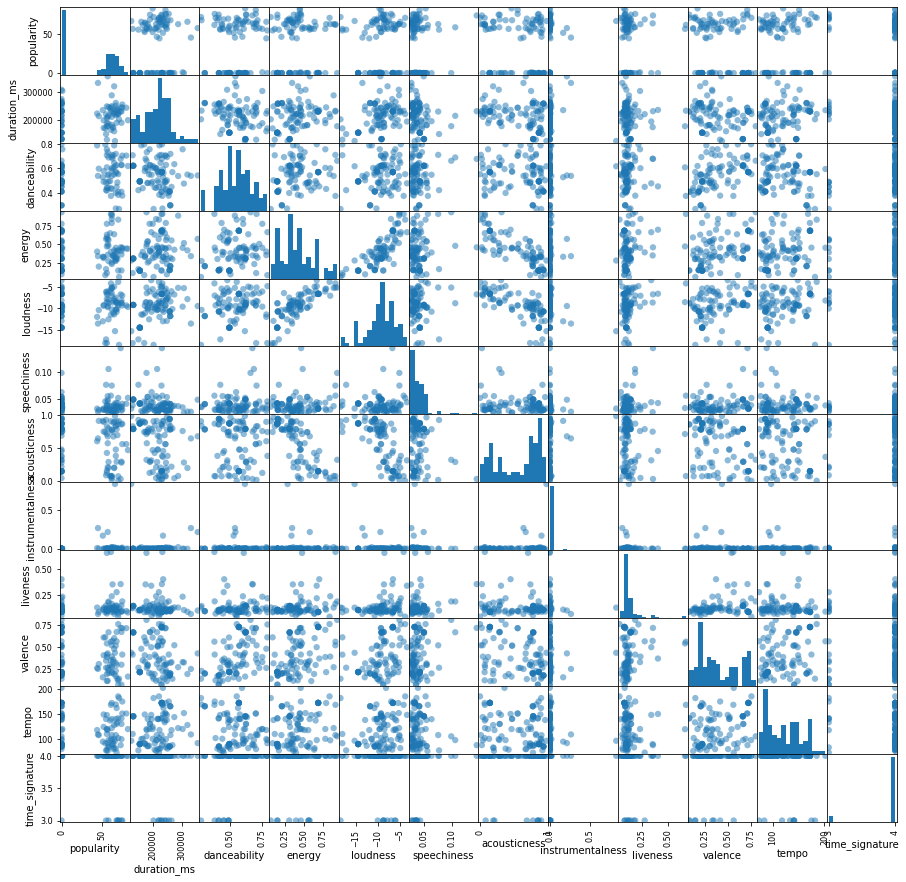

In [8]:
# EDA with numeric variables
X_con = songs.iloc[:,6:]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_con, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,15), cmap=cmap)

Here we are performing **Exploratory Data Analysis (EDA)** on the numerical variables of the DataFrame songs. The code first creates a new DataFrame called X_con that contains only the numerical variables of songs. Then, it creates a scatter plot matrix of the variables in X_con. The scatter plot matrix shows the relationship between each pair of variables.

The scatter_matrix() function takes the following arguments:

X: The DataFrame containing the variables to plot.
marker: The marker style for the scatter plots.
s: The size of the scatter plots.
hist_kwds: Keyword arguments for the histograms of the variables.
figsize: The size of the figure.
cmap: The colormap for the scatter plots.
In this case, the marker argument is set to 'o', so the scatter plots will use circles as markers. The s argument is set to 40, so the scatter plots will be large. The hist_kwds argument is set to {'bins':15}, so the histograms will have 15 bins. The figsize argument is set to (15,15), so the figure will be 15 inches wide and 15 inches high. The cmap argument is set to 'gnuplot', which is a colormap that is often used in scientific plotting.

The scatter plot matrix shows that some of the variables are correlated with each other. For example, the danceability and energy variables are positively correlated, which means that tracks with high danceability tend to also have high energy. The loudness and valence variables are negatively correlated, which means that tracks with high loudness tend to have low valence.

The scatter plot matrix can be used to identify relationships between variables and to explore the data. It can also be used to identify outliers, which are data points that are significantly different from the rest of the data.








The code you have provided creates a scatter matrix of the numerical columns of the DataFrame songs. A scatter matrix is a plot that shows the relationship between each pair of variables in a DataFrame.

The code first creates a new DataFrame, X_con, that contains only the numerical columns of the DataFrame songs. The iloc method of a DataFrame takes two arguments:

row_index: The row indices to select.
column_index: The column indices to select.
In this case, the row_index argument is set to :, which means that all rows are selected. The column_index argument is set to 6:, which means that the columns from 6 to the end are selected.

The scatter_matrix() function of the pd.plotting module creates a scatter plot of each pair of variables in the DataFrame. The marker argument specifies the marker type to use for the scatter plots. The s argument specifies the size of the markers. The hist_kwds argument specifies the keyword arguments to use for the histograms that are plotted along the diagonal of the scatter matrix. The figsize argument specifies the size of the figure. The cmap argument specifies the colormap to use for the scatter plots.

The output of the code is a scatter matrix that shows the relationships between all of the numerical columns in the DataFrame songs. This can be used to explore the relationships between the variables and to identify any potential correlations.





The code you have provided performs Exploratory Data Analysis (EDA) on the numeric variables of the DataFrame songs. The scatter_matrix() function plots the pairwise scatter plots of all the numeric variables in the DataFrame. The diagonal plots of the scatter matrix are histograms of the corresponding variables.

The cmap argument specifies the colormap to use for the scatter plots. The hist_kwds argument specifies the keyword arguments to pass to the hist() function when plotting the histograms. The figsize argument specifies the size of the figure in inches.

The output of the code is a scatter matrix plot, which can be used to visualize the relationships between the numeric variables in the DataFrame.

Here is a brief interpretation of the scatter matrix plot:

The scatter plot between danceability and energy shows a positive correlation, which means that tracks with high danceability tend to also have high energy.
The scatter plot between loudness and valence shows a negative correlation, which means that tracks with high loudness tend to have low valence.
The scatter plot between speechiness and acousticness shows a negative correlation, which means that tracks with high speechiness tend to have low acousticness.
The scatter plot between instrumentalness and liveness shows a positive correlation, which means that tracks with high instrumentalness tend to have high liveness.
These are just a few of the insights that can be gained from the scatter matrix plot. By exploring the relationships between the numeric variables, you can gain a better understanding of the data and identify any patterns or trends.

In [9]:
songs = songs.drop(['popularity','instrumentalness','time_signature','liveness'],axis=1)

array([[<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>, <Axes: >]], dtype=object)

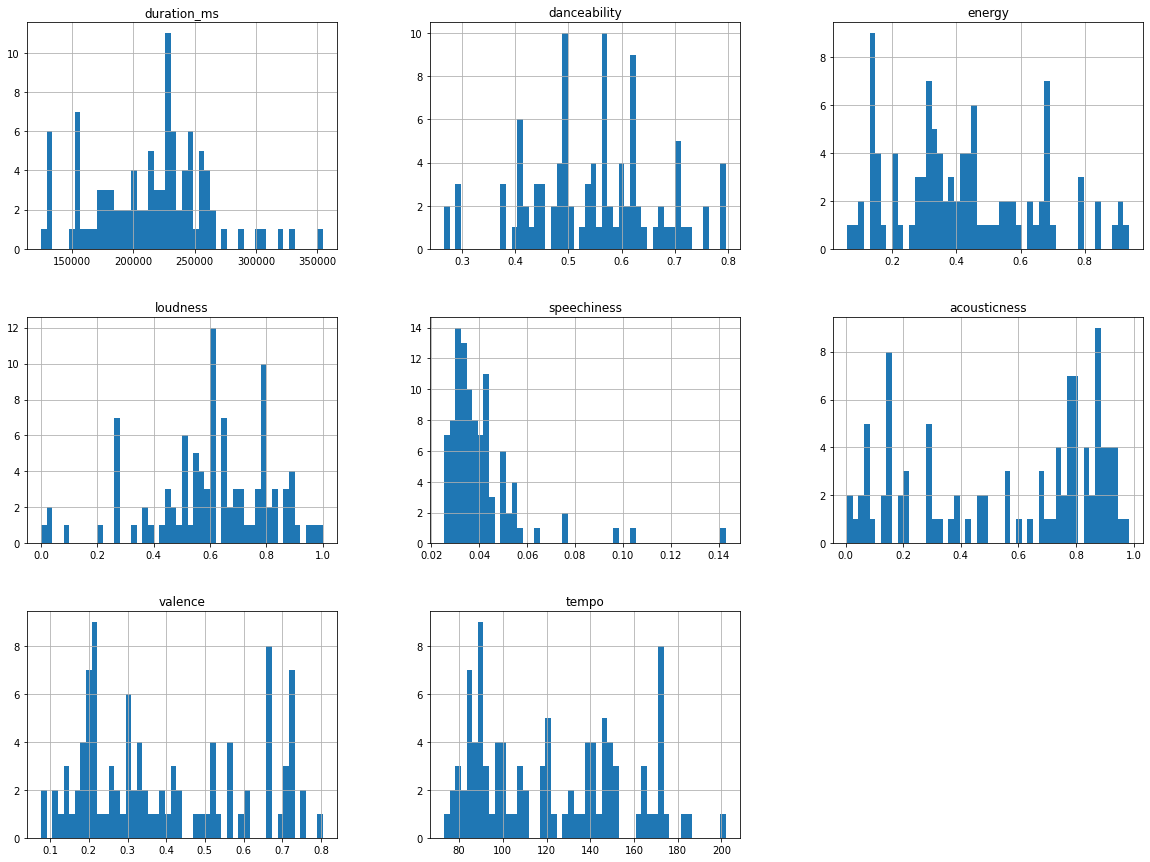

In [10]:
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

songs.hist(bins=50,figsize=(20,15))

In [11]:
songs_features = songs.copy()
songs_features = songs_features.drop(['track_name','artists','album_name','track_id','explicit','acousticness','track_genre'],axis=1)

In [12]:
songs_features.head(10)

,duration_ms,danceability,energy,loudness,speechiness,valence,tempo
0,230666,0.676,0.4610,0.780593,0.1430,0.7150,87.917
1,149610,0.420,0.1660,0.084898,0.0763,0.2670,77.489
2,210826,0.438,0.3590,0.582410,0.0557,0.1200,76.332
3,201933,0.266,0.0596,0.000000,0.0363,0.1430,181.740
4,198853,0.618,0.4430,0.585926,0.0526,0.1670,119.949
5,214240,0.688,0.4810,0.643895,0.1050,0.6660,98.017
6,229400,0.407,0.1470,0.642900,0.0355,0.0765,141.284
7,242946,0.703,0.4440,0.609140,0.0417,0.7120,150.960
8,189613,0.625,0.4140,0.650992,0.0369,0.6690,130.088
9,205594,0.442,0.6320,0.779001,0.0295,0.1960,78.899


C:\Users\kriti\AppData\Local\Temp/ipykernel_1832/363548344.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')
C:\Users\kriti\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


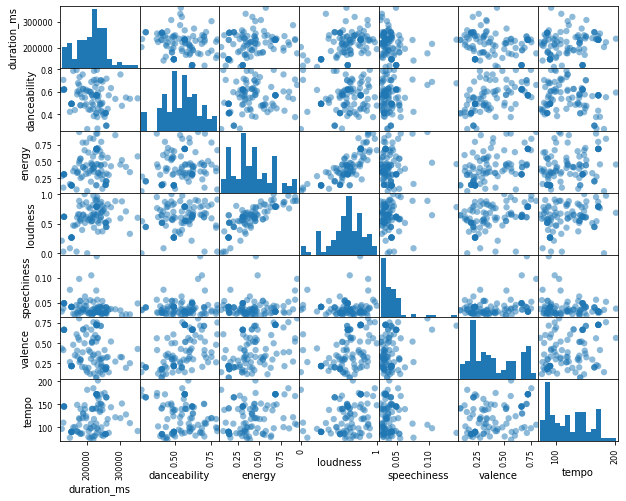

In [13]:
X_aud = songs_features
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_aud, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,8), cmap=cmap)

In [14]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
Sum_of_squared_distances = []
K = range(1, 15)

for k in K:
    km = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init to the current default value
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [15]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5990001306574502)
For n_clusters = 3, silhouette score is 0.6197933110710045)
For n_clusters = 4, silhouette score is 0.5691339123989957)
For n_clusters = 5, silhouette score is 0.5878002403768111)
For n_clusters = 6, silhouette score is 0.5601411059238381)
For n_clusters = 7, silhouette score is 0.5794686189478384)
For n_clusters = 8, silhouette score is 0.594001468601914)
For n_clusters = 9, silhouette score is 0.6126629374303711)
For n_clusters = 10, silhouette score is 0.6523579963735034)
For n_clusters = 11, silhouette score is 0.6513105348152639)
For n_clusters = 12, silhouette score is 0.6447471159046105)
For n_clusters = 13, silhouette score is 0.6543535200235242)
For n_clusters = 14, silhouette score is 0.6565451321405112)


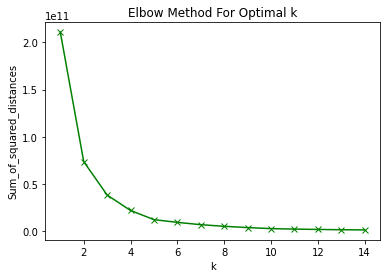

In [16]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)

KMeans(n_clusters=4)

In [18]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

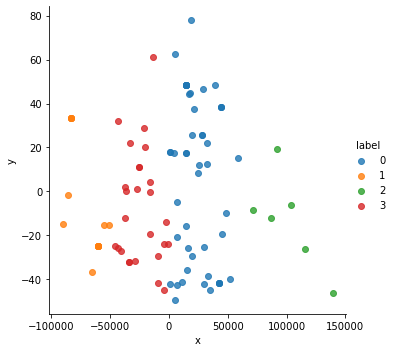

In [19]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [20]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

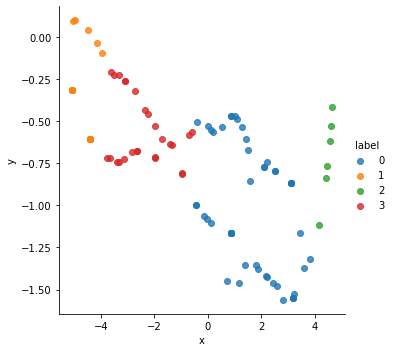

In [21]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [22]:
pca.explained_variance_ratio_

array([9.99999501e-01, 4.98469572e-07])

In [23]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      duration_ms  danceability    energy  loudness   speechiness  \
PC-1     1.000000 -5.265183e-07  0.000001  0.000002 -6.435095e-08   
PC-2    -0.000117 -4.779692e-04  0.001605  0.001527 -5.171241e-05   

           valence     tempo  
PC-1 -8.651254e-07  0.000117  
PC-2  2.264819e-03  0.999995  


In [24]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

label
0    51
3    26
1    17
2     6
Name: count, dtype: int64

In [25]:
songs.isnull().any()

track_id        False
artists         False
album_name      False
track_name      False
explicit        False
track_genre     False
duration_ms     False
danceability    False
energy          False
loudness        False
speechiness     False
acousticness    False
valence         False
tempo           False
label           False
dtype: bool

In [26]:
features = ['danceability','energy','loudness','speechiness','acousticness','valence','tempo']

In [31]:
print(sns.__version__)

0.11.2


In [33]:
songs[songs['label'] == 0].tail(10)

,track_id,artists,album_name,track_name,explicit,track_genre,duration_ms,danceability,energy,loudness,speechiness,acousticness,valence,tempo,label
43,1MLr9b1fOybO3MGiLy47Ys,Brandi Carlile;Lucius,Country Road Songs,You and Me on the Rock,False,acoustic,230098,0.568,0.686,0.787955,0.0330,0.1500,0.725,172.075,0
19,6CgNoAbFJ4Q4Id4EjtbXlC,Boyce Avenue;Bea Miller,"Cover Sessions, Vol. 4",Photograph,False,acoustic,260186,0.717,0.320,0.671354,0.0283,0.8300,0.322,107.946,0
27,0dzKBptH2P5j5a0MifBMwM,Jason Mraz,Feeling Good - Adult Pop Favorites,If It Kills Me,False,acoustic,273653,0.633,0.429,0.778073,0.0381,0.0444,0.520,143.793,0
70,16dkWKIlBsfYTISCVuDs0w,Ron Pope,Whatever It Takes,A Drop In the Ocean,False,acoustic,219480,0.484,0.573,0.817935,0.0298,0.0882,0.346,139.966,0
23,0BUuuEvNa5T4lMaewyiudB,Jason Mraz,Coffee Moment,93 Million Miles,False,acoustic,216386,0.572,0.454,0.545798,0.0258,0.4770,0.515,140.182,0
15,1KHdq8NK9QxnGjdXb55NiG,Landon Pigg,The Boy Who Never,Falling in Love at a Coffee Shop,False,acoustic,244986,0.489,0.561,0.701864,0.0274,0.2000,0.238,83.457,0
13,0X9MxHR1rTkEHDjp95F2OO,Anna Hamilton,Bad Liar,Bad Liar,False,acoustic,248448,0.691,0.234,0.800822,0.0285,0.7770,0.209,87.103,0
41,1WFVfVjCtbmdIv7j3Fa9iy,Brandi Carlile,Mellow Adult Pop,When You're Wrong,False,acoustic,266960,0.568,0.301,0.553956,0.0373,0.7960,0.142,88.029,0
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,False,acoustic,242946,0.703,0.444,0.609140,0.0417,0.5590,0.712,150.960,0
74,0Zf1BPkkFAWGtVHeBwHHz4,Ingrid Michaelson,It Doesn't Have To Make Sense,Light Me Up,False,acoustic,247840,0.417,0.595,0.708032,0.0396,0.1580,0.117,147.928,0


In [34]:
songs[songs['label']==1].head(10)

,track_id,artists,album_name,track_name,explicit,track_genre,duration_ms,danceability,energy,loudness,speechiness,acousticness,valence,tempo,label
90,04JS6OitE9VGsIS3S94Osg,The Civil Wars,Slow Christmas Songs 2022,I Heard The Bells On Christmas Day,False,acoustic,154440,0.492,0.145,0.266034,0.0422,0.872,0.218,90.078,1
85,4LGF2tDg3878bs0mQPByZ4,Eddie Vedder,Into The Wild (Music For The Motion Picture),Guaranteed,False,acoustic,164500,0.436,0.400,0.466273,0.0272,0.904,0.351,100.734,1
30,3EQV1ZHtHvq9OnVRYIdbg3,Jason Mraz,Merry Christmas,Winter Wonderland,False,acoustic,131760,0.620,0.309,0.617232,0.0495,0.788,0.664,145.363,1
93,30cYWLpVdBZVLb1cYdmcTT,The Civil Wars,Acoustic Christmas Campfire,I Heard The Bells On Christmas Day,False,acoustic,154440,0.492,0.145,0.266034,0.0422,0.872,0.218,90.078,1
95,15BFn2VmEtonsXfNL1lUmy,The Civil Wars,Chill Christmas Dinner,I Heard The Bells On Christmas Day,False,acoustic,154440,0.492,0.145,0.266034,0.0422,0.872,0.218,90.078,1
94,7sUqJ51FGSi3n7x4pYjY3v,The Civil Wars,Lonely Christmas 2022,I Heard The Bells On Christmas Day,False,acoustic,154440,0.492,0.145,0.266034,0.0422,0.872,0.218,90.078,1
91,5OGpsZeJRZ3t3MZioawcZW,The Civil Wars,Alternative Christmas 2022,I Heard The Bells On Christmas Day,False,acoustic,154440,0.492,0.145,0.266034,0.0422,0.872,0.218,90.078,1
96,0WOFJR54wyTwLB11jcBDb1,The Civil Wars,sadsadchristmas,I Heard The Bells On Christmas Day,False,acoustic,154440,0.492,0.145,0.266034,0.0422,0.872,0.218,90.078,1
62,7x4b0UccXSKBWxWmjcrG2T,Kurt Cobain,Montage Of Heck: The Home Recordings,And I Love Her,False,acoustic,124933,0.616,0.282,0.212111,0.0331,0.983,0.435,96.638,1
66,6VwAh8Z1d5YKoSWoEaV4db,Aaron Espe,Making All Things New,Making All Things New,False,acoustic,159600,0.787,0.355,0.469987,0.0288,0.896,0.480,99.978,1


In [35]:
songs[songs['label']==2].head(10)

,track_id,artists,album_name,track_name,explicit,track_genre,duration_ms,danceability,energy,loudness,speechiness,acousticness,valence,tempo,label
55,6xJOhSm4SvZwzy3uhWz26O,Andrew Belle,Black Bear,The Enemy,False,acoustic,286865,0.536,0.890,0.881674,0.0375,0.078,0.273,121.974,2
72,3Et4LKZLnXygPYfNdeB3D3,Andrew Belle,Dive Deep,When the End Comes,False,acoustic,354400,0.541,0.575,0.600385,0.0491,0.677,0.428,91.980,2
68,7LwGBxB0h0CVmkOZxYKn0g,Andrew Belle,In My Veins (Feat. Erin Mccarley),In My Veins - Feat. Erin Mccarley,False,acoustic,318908,0.548,0.420,0.707899,0.0277,0.198,0.196,128.012,2
40,6sp6Vx3sv2l5qxPfbQkcyt,Eddie Vedder,Mega Hits Autumn/Fall 2022,The Haves,False,acoustic,306794,0.474,0.519,0.877098,0.0253,0.281,0.326,151.832,2
77,4qCbMMMuEB56kHd4zPE6GD,Eddie Vedder;Nusrat Fateh Ali Khan,"Eat, Pray, Love",The Long Road,False,acoustic,330933,0.537,0.342,0.329111,0.0273,0.645,0.253,109.236,2
25,6D33wCKzWtNEgOovgeVJ7r,Jason Mraz,Mellow Adult Pop,Bella Luna,False,acoustic,302346,0.755,0.454,0.590701,0.0352,0.757,0.330,120.060,2


In [36]:
songs[songs['label']==3].head(10)

,track_id,artists,album_name,track_name,explicit,track_genre,duration_ms,danceability,energy,loudness,speechiness,acousticness,valence,tempo,label
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,False,acoustic,214240,0.688,0.481,0.643895,0.1050,0.289,0.666,98.017,3
14,4LbWtBkN82ZRhz9jqzgrb3,Chord Overstreet;Deepend,Hold On (Remix),Hold On - Remix,False,acoustic,188133,0.755,0.780,0.824501,0.0327,0.124,0.387,120.004,3
99,7cPuE0M35EajWPRO3nRcH8,KT Tunstall,OO's Music Grandi Successi,Suddenly I See,False,acoustic,199040,0.603,0.780,0.861179,0.0438,0.139,0.693,100.499,3
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,False,acoustic,205594,0.442,0.632,0.779001,0.0295,0.426,0.196,78.899,3
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,False,acoustic,189613,0.625,0.414,0.650992,0.0369,0.294,0.669,130.088,3
18,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,False,acoustic,189613,0.625,0.414,0.650992,0.0369,0.294,0.669,130.088,3
64,0wbmIfvndFV9VDvuUY1pYN,Tim Halperin,Covers,Always Be My Baby,False,acoustic,181852,0.582,0.255,0.547921,0.0306,0.772,0.285,139.884,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic,198853,0.618,0.443,0.585926,0.0526,0.469,0.167,119.949,3
78,11TK5KLtLZUdKr1C549bAw,Drew Holcomb & The Neighbors,Good Light,What Would I Do Without You,False,acoustic,172213,0.602,0.336,0.491411,0.0369,0.883,0.335,90.894,3
89,0qJGlogD7AyMLAJfQ42aI2,Five For Fighting,Bookmarks,Heaven Knows,False,acoustic,210612,0.600,0.845,0.758705,0.0311,0.048,0.392,97.631,3


array([[<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

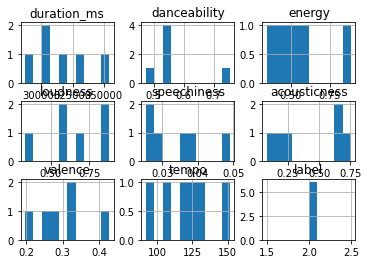

In [37]:
songs[songs['label']==2].hist()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [40]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'
    cm = confusion_matrix(y_true, y_pred) 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax) 
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]), 
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label') 
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor") 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[15  0  0  3]
 [ 0  6  0  0]
 [ 1  0  0  0]
 [ 0  1  0  7]]


<Axes: title={'center': 'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

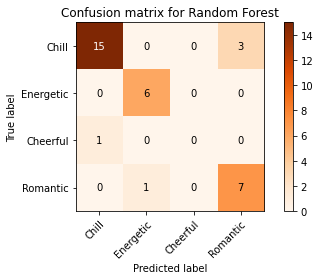

In [57]:
# Confusion matrix
definitions = ['Chill','Energetic','Cheerful','Romantic']
plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest',cmap='Oranges')

In [48]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('duration_ms', 0.47827020909312074),
 ('danceability', 0.05402980472232711),
 ('energy', 0.09549257115296232),
 ('loudness', 0.1379381929428798),
 ('speechiness', 0.08120030229627566),
 ('valence', 0.07749959145847764),
 ('tempo', 0.0755693283339568)]

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Confusion matrix, without normalization
[[15  0  0  3]
 [ 0  6  0  0]
 [ 0  0  1  0]
 [ 0  0  0  8]]


<Axes: title={'center': 'Confusion matrix for KNN'}, xlabel='Predicted label', ylabel='True label'>

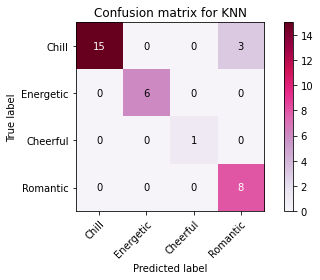

In [53]:
knn_pred =knn.predict(X_test)
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN',cmap='PuRd')

In [54]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[15  0  0  3]
 [ 0  6  0  0]
 [ 0  0  1  0]
 [ 0  0  0  8]]


<Axes: title={'center': 'Confusion matrix for SVM'}, xlabel='Predicted label', ylabel='True label'>

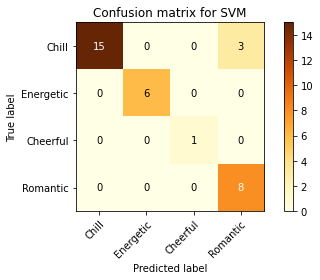

In [58]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM',cmap='YlOrBr')

In [38]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

Confusion matrix, without normalization
[[15  0  0  0]
 [11  0  0  0]
 [ 3  0  0  0]
 [ 4  0  0  0]]


<Axes: title={'center': 'Confusion matrix for MLP'}, xlabel='Predicted label', ylabel='True label'>

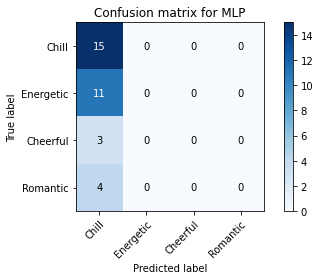

In [40]:
mlp_pred = mlp.predict(X_test)
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [41]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

       Chill       0.45      1.00      0.62        15
   Energetic       0.00      0.00      0.00        11
    Cheerful       0.00      0.00      0.00         3
    Romantic       0.00      0.00      0.00         4

    accuracy                           0.45        33
   macro avg       0.11      0.25      0.16        33
weighted avg       0.21      0.45      0.28        33
MLP


In [42]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

       Chill       0.94      1.00      0.97        15
   Energetic       1.00      1.00      1.00        11
    Cheerful       1.00      0.67      0.80         3
    Romantic       1.00      1.00      1.00         4

    accuracy                           0.97        33
   macro avg       0.98      0.92      0.94        33
weighted avg       0.97      0.97      0.97        33
SVM


In [43]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

       Chill       0.79      1.00      0.88        15
   Energetic       1.00      0.73      0.84        11
    Cheerful       1.00      0.67      0.80         3
    Romantic       1.00      1.00      1.00         4

    accuracy                           0.88        33
   macro avg       0.95      0.85      0.88        33
weighted avg       0.90      0.88      0.88        33
KNN


In [44]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

       Chill       0.83      1.00      0.91        15
   Energetic       1.00      1.00      1.00        11
    Cheerful       0.00      0.00      0.00         3
    Romantic       1.00      1.00      1.00         4

    accuracy                           0.91        33
   macro avg       0.71      0.75      0.73        33
weighted avg       0.83      0.91      0.87        33
forest
